# Introdução à Programação em Python
## Notebook 09 - Simulação discreta estocástica
## Carlos Caleiro, Jaime Ramos
## Dep. Matemática, IST - 2016

(actualizado em 8 de Fevereiro de 2018)

# Simulação Discreta Estocástica

Existem diversos tipos de simulação de sistemas:

A **simulação analógica** é realizada com modelos físicos (por exemplo, modelo reduzido de uma ponte). Em contraposição, a **simulação digital** é realizada em computador.
 
A simulação pode ser realizada através de **modelos contínuos** (tipicamente recorrendo a equações diferenciais que descrevem a evolução de grandezas contínuas) ou através de **modelos discretos**. A simulação discreta trata fenómenos que se podem descrever por eventos e suas consequências (por exemplo excitação de electrões por incidência de fotões).

A simulação pode ainda ser classificada como **determinista** ou como **estocástica**. Neste último caso, as grandezas em causa seguem leis aleatórias (por exemplo, o tempo que decorre entre a incidência de dois fotões será aleatório).

Nesta secção apresenta-se e ilustra-se uma técnica de **simulação digital, discreta e estocástica**, a propósito de um problema de tráfego facilmente entendível pelos alunos do primeiro ano. A técnica adoptada é a de *sequenciamento de eventos pendentes (SEP)*.

## Problema

Pretende-se simular o tráfego num troço de estrada com portagem, só num dos sentidos. 

Os veículos entram no troço em causa com uma cadência aleatória no final do qual chegam à portagem (apenas com um portageiro), ficam em fila  até ao pagamento e, concluído este, saem do troço. 

Pretende-se estudar a evolução do número de veículos na fila de espera, em função das leis aleatórias  (discutidas adiante) do tempo entre chegadas, do tempo de travessia e do tempo de pagamento.

## Eventos e seus atributos

Segundo a técnica SEP (*sequenciamento de eventos pendentes*), o primeiro passo é a identificação das categorias de eventos que afectam o sistema a modelar. Neste caso há que considerar apenas três categorias (baptizadas segundo a tradição da simulação de sistemas de filas de espera):

* "arr" (*arrival*): chegada de um veículo ao troço em estudo;
* "ess" (*end of self-service*): chegada de um veículo à portagem no final do troço;
* "dep" (*departure*): saída de um veículo da portagem após pagamento.

Cada evento é caracterizado por diversos **atributos**, entre os quais são essenciais:

* *time*: instante em que se dá o evento;
* *kind*: categoria do evento.

Em simulações mais complicadas pode ser necessário considerar outros atributos. Por exemplo, poderia ser necessário associar cada evento ao veículo em causa se se pretendesse estudar o tempo total de permanenência dos carros no troço incluindo portagem, ou o tempo médio de permanência na fila da portagem. 

O módulo seguinte estabelece de maneira trivial uma camada que disponibiliza a construção de eventos e o acesso aos atributos destes. Recorde-se que todos módulos por nós definidos se encontram guardados na pasta `modules`.

In [ ]:
# %load modules/event
# Modulo event
# Disponibiliza as operacoes necessarias para a criacao e
# manipulacao de eventos

def evt(t,k):
    return [t,k]
    
def time(e):
    return e[0]
    
def kind(e):
    return e[1]

Seguem-se alguns exemplos de utilização deste módulo.

In [1]:
import sys
sys.path.append('./modules')
import event

In [4]:
e1=event.evt(2.5,"arr")

A variável ``e1`` pretende representar um evento de tipo chegada (``arr``) no instante ``2.5``. Podemos consultar as características deste evento como se segue:

In [5]:
event.time(e1)

2.5

In [6]:
event.kind(e1)

'arr'

## Números pseudo-aleatórios

O segundo passo da técnica SEP é a definição das leis aleatórias que regem o acontecimento dos eventos. No caso vertente, há que considerar:

* *chegadas*: admite-se que o tempo entre chegadas consecutivas é uma variável aleatória com distribuição exponencial de valor médio ``ba`` (*between arrivals*);

* *travessias*: admite-se que o tempo que cada veículo leva a atravessar o troço até à portagem é uma variável aleatória com distribuição exponencial de valor médio ``ss`` (*self-service*);

* *pagamentos*: admite-se que o tempo que cada veículo leva a pagar (tempo entre o início do pagamento, depois de ficar em primeiro lugar na fila, e a saída) é uma variável aleatória com distribuição exponencial de valor médio ``st`` (*service time*).

Uma *variável aleatória exponencial* de valor médio ``m`` tem a distribuição $1-e^{-\frac{t}{m}}$. Por exemplo, escolhendo ``m=2``:

<IPython.core.display.Javascript object>


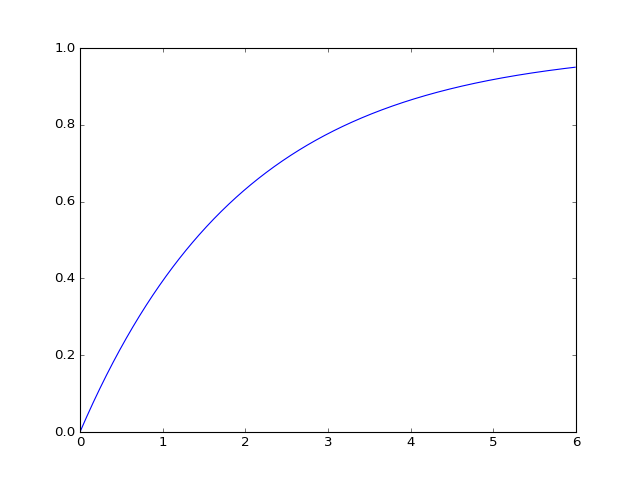

In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 6.0, 0.01)
s = 1-np.e**(-t/2)
plt.plot(t, s)

Por exemplo,

In [32]:
1-np.e**(-6/2)

0.950212931632136

Este último cálculo interpreta-se do seguinte modo: a probabilidade de que o valor observado (``t=6``) seja inferior ou igual a 3 vezes o valor médio (``m=2``) é um pouco mais de 95%. Ou seja, a probabilidade de que o valor observado seja superior a 3 vezes o valor médio é inferior a 5%.

As variáveis aleatórias exponenciais são muito comuns em sistemas discretos. A justificação deste facto é um resultado interessante da Teoria da Probabilidade e é analisada em profundidade na disciplina de **Processos Estocásticos**.

O terceiro passo da técnica SEP consiste em definir procedimentos para simular a observação das variáveis aleatórias em causa. O módulo `obsrand` seguinte estabelece uma camada que disponibiliza o procedimento ``exprandom``. 

In [ ]:
# %load modules/obsrand
# Modulo obsrand
# Disponibiliza uma função para gerar observações de uma variavel aleatoria
# com distribuicao exponencial
from random import random
from math import log

def exprandom(m):
    x=random()
    return -m*log(x)

Cada invocação de ``exprandom(m)`` retorna uma observação da variável aleatória exponencial de valor médio ``m``. A justificação do código utilizado na implementação será objecto de estudo em disciplina ulterior, nomeadamente na disciplina de **Simulação**. Note-se que existem módulos (nas diversas linguagens de programação) de procedimentos para simular a observação de muitas variáveis aleatórias, os quais podem ser utilizados pelo engenheiro sem preocupação com as respectivas implementações.

Vale a pena experimentar o procedimento ``exprandom``.

In [10]:
import obsrand

In [11]:
obsrand.exprandom(2)

2.6649852382724966

In [12]:
obsrand.exprandom(2)

0.4472487154492861

In [13]:
obsrand.exprandom(2)

0.770886097617264

In [14]:
obsrand.exprandom(100)

52.55775706587092

In [15]:
obsrand.exprandom(100)

95.48996178976442

## Cadeia de acontecimentos pendentes

Segundo a técnica SEP, o núcleo de um simulador é a **cadeia de acontecimentos pendentes**: CAP. 

Para se entender a utilidade da CAP, considere-se o problema da simulação de tráfego em estudo na situação em que há veículos já no troço, há veículos na fila e está um veículo a pagar a portagem. Como deverá continuar a simulação a partir desta situação? 

Note-se que a simulação é essencialmente um ciclo em que em cada passo se simula o acontecimento de um evento. 

Põe-se então a questão: qual será o próximo evento a simular?

Pode ser a chegada de um novo veículo ao troço (``"arr"``). Pode ser o fim da travessia por parte de um veículo que já se encontra no troço, isto é, a sua entrada na fila (``"ess"``). Pode ainda ser a conclusão do pagamento por parte do veículo que está a pagar (``"dep"``).

A resposta é simples: *vai-se buscar à CAP o próximo evento*. Por próximo entenda-se o evento na CAP com ``time`` de menor valor.

Põe-se então outra questão: *como alimentar a CAP de novos eventos*?

A resposta a esta questão já é mais complicada. Primeiro note-se que na CAP **devem estar os eventos que já sabemos que terão de ser simulados no futuro (e que ainda não foram simulados por ainda não ter chegado a vez deles)**.

**De cada vez que se simula uma chegada** (``"arr"``) ao troço deve-se colocar na CAP a próxima chegada: basta guardar na CAP o evento

    evt(ct+exprandom(ba),"arr") 
	
em que ``ct`` é a variável do simulador que contém o tempo corrente (*current time*). 

Também se deve colocar na CAP o fim da travessia do veículo cuja entrada se está a simular, guardando na CAP o evento 

	evt(ct+exprandom(ss),"ess").
    
**De cada vez que se simula um fim de travessia do troço** (``"ess"``) há que examinar se o portageiro está ocupado. 

Se estiver ocupado há que colocar mais este veículo na fila de espera. 

Caso contrário começa a fase de pagamento do veículo. Pode-se então calcular o evento de fim de pagamento (``"dep"``) e, portanto, deve-se guardar na CAP o evento  

	evt(ct+exprandom(st),"dep").
    
Finalmente, **de cada vez que se simula uma saída** (``"dep"``), ou seja, fim de pagamento, há que examinar a fila de espera. 

Se esta estiver vazia há que colocar o portageiro no estado de desocupado. 

Caso contrário, há que retirar um elemento da fila (o primeiro) e planificar o fim do pagamento desse veículo guardando na CAP o evento  

	evt(ct+exprandom(st),"dep").

A CAP (*schedule*) é, portanto, uma colecção de eventos com as operações introduzidas no pacote seguinte:

In [ ]:
# %load modules/cap
# Modulo cap
# Disponibiliza as operacoes necessarias para a criacao e
# manipulacao da Cadeia de Acontecimentos Pendentes

import event

def newc():
    return []
    
def addE(c,e):
    return [e1 for e1 in c if event.time(e1)<event.time(e)]+[e]+\
           [e1 for e1 in c if event.time(e1)>event.time(e)]

def delE(c):
    if len(c)>0:
        return c[1:]
    else:
        print("Erro de delE! A cap está vazia")

def nextE(c):
    if len(c)>0:
        return c[0]
    else:
        print("Erro de nextE! A cap está vazia")
        
def showE(c):
    for e in c:
        print(event.time(e), event.kind(e))   

Note-se que a implementação escolhida mantém ordenados numa lista os eventos segundo o atributo ``time``. Assim, a função ``nextE`` devolve o primeiro elemento da lista. A função ``addE`` é mais complicada pois insere na lista o evento dado na posição imposta pelo seu atributo ``time``. A função ``delE`` apaga o próximo evento da CAP, ou seja, o primeiro elemento da lista. Note-se que quer o método ``nextE`` quer o método ``delE`` verificam se a lista de eventos se encontra vazia, caso em que ocorre um erro por não existir próximo elemento.

## Simulador

Recorrendo às camadas anteriores, é possível finalmente codificar o simulador. Como já foi dito, *o simulador consiste basicamente num ciclo: em cada passo simula-se o próximo evento na CAP*. 

Na simulação de cada tipo de evento, a CAP e as variáveis de estado (comprimento da fila, estado do portageiro, etc) são actualizadas e as variáveis em estudo (nomeadamente, o comprimento da fila) são observadas.

As variáveis locais da função ``sim`` são:

* ``busy``: indica se o portageiro está ocupado ou não;
* ``ce``: evento em simulação (*current event*);
* ``ct``: instante actual (*current time*);
* ``ck``: categoria do evento em simulação (*current kind*);
* ``nss``: número de veículos no troço (*number of clients in self-service*);
* ``nwc``: comprimento da fila de espera da portagem (*number of waiting clients*);
* ``c``: CAP;
* ``tnc``: número total de veículos que já entraram no troço (*total number of clients*);

In [4]:
# %load modules/simulador
import cap
import event
import obsrand

import matplotlib.pyplot as plt

    
def sim(ht,ba,ss,st):

    c = cap.newc()
    ce = event.evt(0,"arr")
    ct = event.time(ce)
    ck = event.kind(ce)
    tnc = 0
    busy = False
    nwc = 0
    xtrace = [0]
    ytrace = [0]
    
    while ct <= ht:

        if ck == "arr":
            tnc = tnc+1
            c=cap.addE(c,event.evt(ct+obsrand.exprandom(ba),"arr"))
            c=cap.addE(c,event.evt(ct+obsrand.exprandom(ss),"ess"))

        elif ck == "ess":
            if busy:
                nwc = nwc+1
            else:
                busy = True
                c=cap.addE(c,event.evt(ct+obsrand.exprandom(st),"dep"))
        else:
            if nwc == 0:
                busy = False
            else:
                nwc = nwc-1
                c=cap.addE(c,event.evt(ct+obsrand.exprandom(st),"dep"))

        ce = cap.nextE(c)
        ct = event.time(ce)
        ck = event.kind(ce)
        c=cap.delE(c)
        xtrace.append(ct)
        ytrace.append(nwc)

    plt.xlabel('Time')
    plt.ylabel('Cars waiting to pay')
    plt.axis([0, max(xtrace), 0, max(ytrace)])
    plt.plot(xtrace,ytrace,'-')

In [2]:
import simulador

In [6]:
sim(1000, 1.0, 50.0, 0.7)

<IPython.core.display.Javascript object>


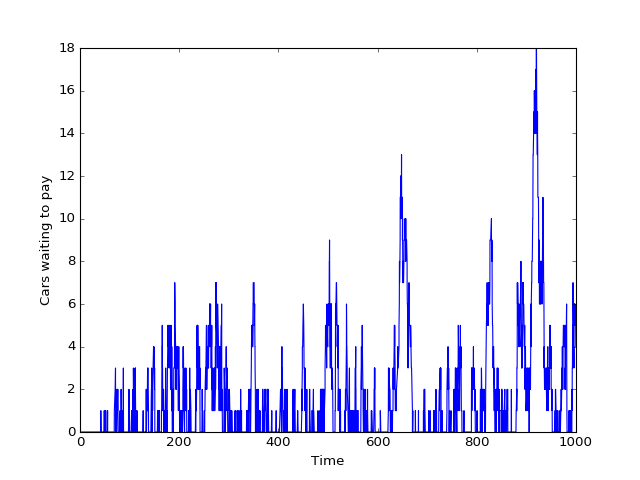

In [11]:
simulador.sim(1000, 1.0, 50.0, 0.7)

<IPython.core.display.Javascript object>


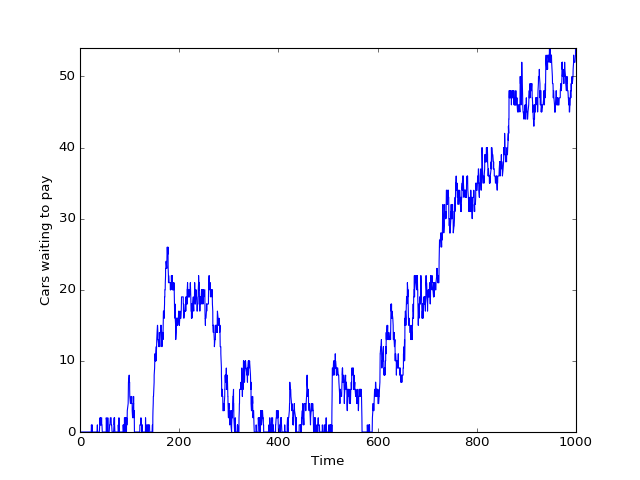

In [37]:
simulador.sim(1000, 1.0, 50.0, 1.0)

<IPython.core.display.Javascript object>


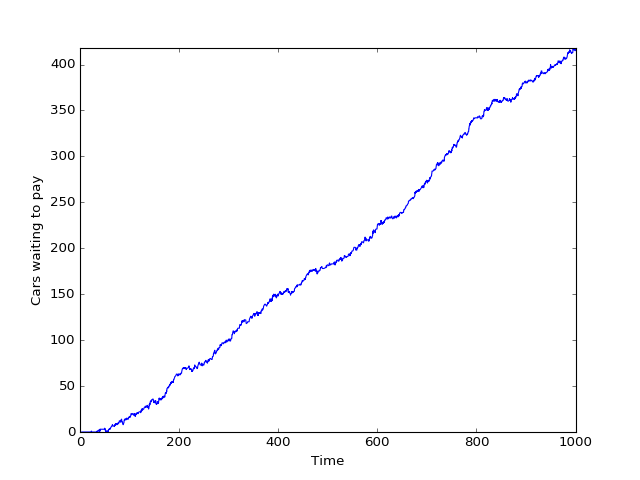

In [37]:
simulador.sim(1000, 1.0, 50.0, 2.0)

<IPython.core.display.Javascript object>


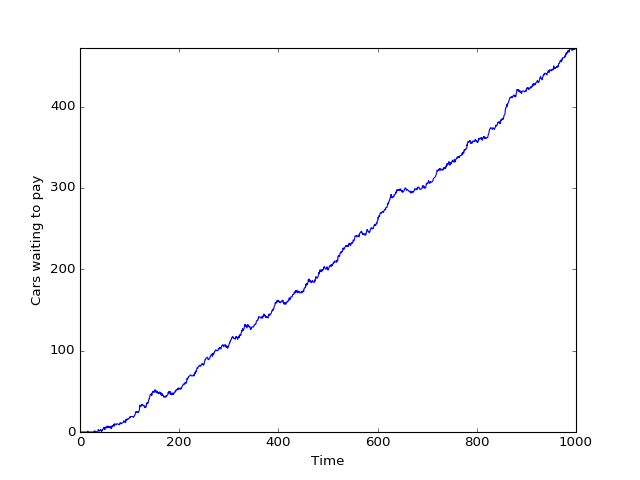

In [13]:
simulador.sim(1000, 1.0, 50.0, 2.0)

<IPython.core.display.Javascript object>


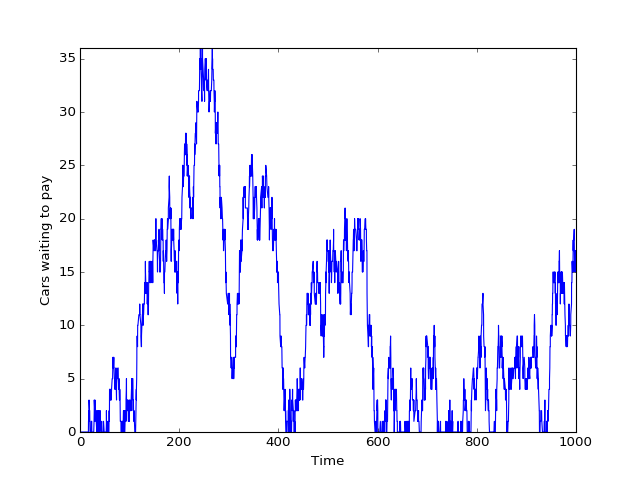

In [19]:
simulador.sim(1000, 1.0, 20.0, 1.0)

## Simulador revisitado

In [32]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Considere-se uma variante do problema anterior em que se pretendem analisar outros parâmetros. Por exemplo, pretende-se analisar o tempo máximo que um veículo esteve à espera para efectuar o pagamento, ou qual foi o tempo médio de espera para efectuar pagamento durante o período de simulação. Ou ainda, obter um gráfico de como evolui o tempo de espera para pagamento durante o período de simulação. 

Neste caso, é necessário enriquecer os veículos com informação adicional. Assim, um veículo deixa de ser um *ponto preto* para passar a ser uma estrutura onde se vão armazenando os diversos tempos. Consequentemente, na portagem deixa de ser suficiente contar o número de veículos à espera de efectuar pagamento passando a ser necessário considerar uma *fila de espera* (*queue*) onde vão sendo colocados os veículos à espera de efectuar pagamento.

Este exemplo permite também ilustrar novamente as vantagens da metodologia de programação por camadas centrada nos dados. Neste caso, apenas vai ser necessário modificar a implementação dos eventos para passarem a incorporar o veiculo a que se referem. No entanto, a implementação da CAP não vai sofrer alterações. Adicionalmente, a implementação das filas de espera também exactamente igual à apresentada anteriormente.

## Carros

Os carros têm uma estrutura semelhante à dos eventos. Têm dois atributos: o tempo de entrada no sistema (tempo de entrada) e o tempo de fim de *self-service*.

O módulo `car` seguinte estabelece de maneira trivial uma camada que disponibiliza a construção de carros e o acesso aos atributos destes.

In [ ]:
# %load modules/car
# Modulo mcar
# Disponibiliza as operações sobre veiculos

def new_car(ta):
    return [ta,0.0]
    
def arr_time(c):
    return c[0]

def ss_time(c):
    return c[1]

def update_ss(c,t):
    return [c[0],t]

## Eventos revisitados

Como consequência da introdução dos carros no sistema, é necessário que os eventos passem a guardar também informação relativa ao carro a que cada evento se refere. Apresenta-se de seguida uma versão revista do módulo dos eventos. A única alteração que é necessário fazer no módulo da CAP é garantir que este importa o módulo de eventos adaptado.

In [ ]:
# %load modules/eventR
# Modulo m_events - versao revista
# Disponibiliza as operacoes necessarias para a criacao e
# manipulacao de eventos

def evt(t,k,c):
    return [t,k,c]
    
def time(e):
    return e[0]
    
def kind(e):
    return e[1]
    
def car(e):
    return e[2]

## Filas de espera

Recorda-se agora a implementação das filas de espera, estudada anteriormente, e definida no módulo `myqueue`. A escolha deste nome destina-se a evitar confitos de nomes uma vez que o Anaconda disponibiliza um módulo `queue`  com uma implementação mais sofisticada das filas de espera. 

In [ ]:
# %load modules/myqueue
# Modulo mqueue
# Disponiliza as operacoes sobre filas de espera

def newq():
    return []
    
def enter(x,f):
    return f+[x]
        
def leave(f):
    if f==newq():
        print("Erro! A fila esta vazia.")
    else:
        return f[1:]
        
def first(f):
    if f==newq():
        print("Erro! A fila está vazia.")
    else:
        return f[0]
        
def empty(f):
    return f==newq()

## Simulador revisitado

In [ ]:
# %load modules/simuladorR
import capR as cap
import eventR as event
import car
import myqueue as queue
import obsrand

import matplotlib.pyplot as plt

    
def sim(ht,ba,ss,st):

    c = cap.newc()
    ta = 0
    ce = event.evt(0,"arr",car.new_car(0))
    ct = event.time(ce)
    ck = event.kind(ce)    
    cc = event.car(ce)
    tnc = 0
    busy = False
    qwc = queue.newq()
    av_wait = 0.0
    nav_wait = 0
    max_time = 0.0
    av_ss_time = 0.0
    nav_ss_time = 0
    
    xtrace = []
    ytrace = []
    
    while ct <= ht:

        if ck == "arr":
            tnc = tnc+1
            ta = ct+obsrand.exprandom(ba)
            c=cap.addE(c,event.evt(ta,"arr",car.new_car(ta)))
            
            ts = ct+obsrand.exprandom(ss)
            cc=car.update_ss(cc,ts)
            c=cap.addE(c,event.evt(ts,"ess",cc))

        elif ck == "ess":
            if busy:
                qwc=queue.enter(cc,qwc)
            else:
                busy = True
                c=cap.addE(c,event.evt(ct+obsrand.exprandom(st),"dep",cc))

        else:
            # Tempo de espera para efectuar pagamento
            wt = ct - car.ss_time(cc)
            
            # Actualizar tempo maximo a espera para pagar
            if wt > max_time:
                max_time = wt
            
            # Actualizar o tempo medio de espera para pagar
            av_wait = av_wait + wt
            nav_wait = nav_wait + 1
            
            # Actualizar o tempo medio na zona de self-service
            av_ss_time = av_ss_time + (car.ss_time(cc)-car.arr_time(cc))
            nav_ss_time = nav_ss_time + 1
            
            xtrace.append(ct)
            ytrace.append(wt)           
            
            if queue.empty(qwc):
                busy = False
            else:
                cc = queue.first(qwc)
                qwc = queue.leave(qwc)
                c = cap.addE(c,event.evt(ct+obsrand.exprandom(st),"dep",cc))

        ce = cap.nextE(c)
        ct = event.time(ce)
        ck = event.kind(ce)
        cc = event.car(ce)
        c = cap.delE(c)

    print('Average waiting time: %5.1f' %(av_wait/nav_wait))
    print('Maximum waiting time: %5.1f' %max_time)
    print('Average self-service time: %5.1f' %(av_ss_time/nav_ss_time))
    
    plt.xlabel('Time')
    plt.ylabel('Current waiting time')
    plt.axis([0, max(xtrace), 0, max(ytrace)])
    plt.plot(xtrace,ytrace,'-')

In [34]:
import sys
sys.path.append('./modules')

import simuladorR as simulador

Average waiting time:   2.1
Maximum waiting time:  10.2
Average self-service time:  46.0


<IPython.core.display.Javascript object>


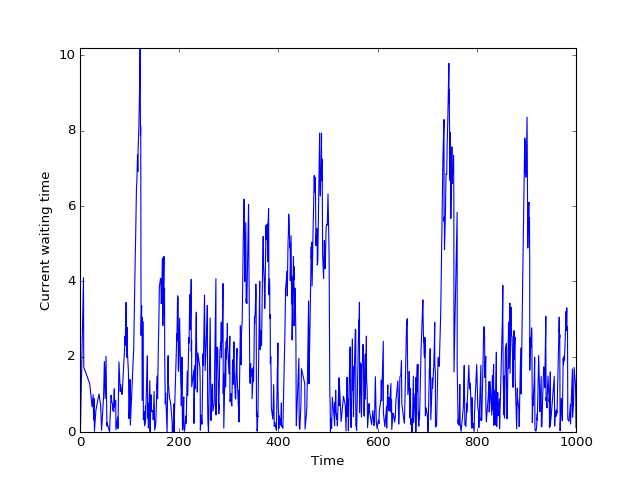

In [35]:
simulador.sim(1000, 1.0, 50.0, 0.7)

Average waiting time:   5.7
Maximum waiting time:  22.7
Average self-service time:  49.2


<IPython.core.display.Javascript object>


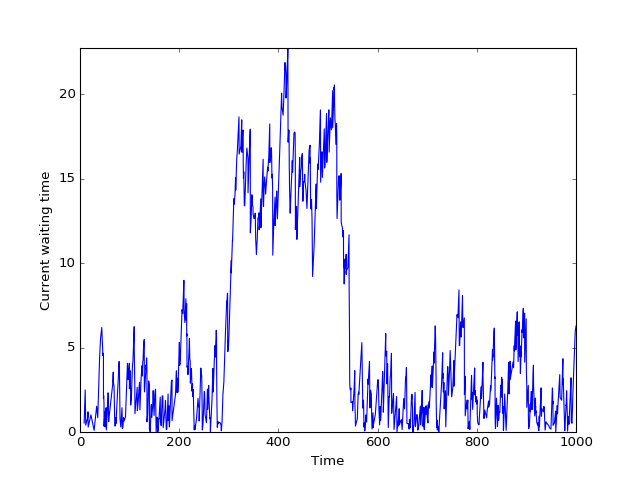

In [36]:
simulador.sim(1000,1.0,50.0,0.9)

# Sumário

* A simulação discreta estocástica permite simular em ambiente computacional problemas reais.
* A construção do simulador adopta a técnica de sequenciamento de eventos pendentes.
* A cadeia de acontecimentos pendentes é a estrutura onde são guardados todos os eventos que já estão programados mas que ainda não aconteceram.
* Este é mais um exemplo de programação em grande escala centrada nos dados. No primeiro exemplo, conseguimos identificar duas camadas: a camada dos eventos; definida sobre esta, encontramos a cadeia de acontecimentos pendentes. O simulador está definido sobre estas duas camadas. 

# Bibliografia

*Introdução à Programação em Mathematica* (3a edição): J. Carmo, A. Sernadas, C. Sernadas, F. M. Dionísio, C. Caleiro, IST Press, 2014.

*Think Python: How to think like a computer scientist*: A. Downey, Green Tea Press, 2012.

*Introduction to Computation and Programming Using Python* (revised and expanded edition): J. V. Guttag, MIT Press,  2013.

*The Art of Computer Programming*: D. E. Knuth, Addison-Wesley (volumes 1--3, 4A), 1998.

*Learning Python* (fifth edition): M. Lutz, O'Reilly Media,  2013.

*Programação em Python: Introdução à programação utilizando múltiplos paradigmas*: J. P. Martins, IST Press, 2015.

*Introdução à Programação em MatLab*: J. Ramos, A. Sernadas e P. Mateus, DMIST, 2005. 

*Learning IPython for Interactive Computing and Data Visualization*: C. Rossant, Packt Publishing,  2013.

*Programação em Mathematica*: A. Sernadas, C. Sernadas e J. Ramos, DMIST, 2003.